In [50]:
# Insurance Fraud Detection - Google Colab Version

In [51]:
## Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [53]:
## Step 2: Load dataset (make sure to upload insurance.csv)
from google.colab import files
uploaded = files.upload()

Saving insurance.csv to insurance (5).csv


In [54]:
df = pd.read_csv('insurance.csv')
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [55]:
## Step 3: Basic info
print(df.shape)
print(df.dtypes)
print(df.isnull().sum())

(1000, 40)
months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_

In [56]:
## Step 4: Drop columns with too many missing or irrelevant
df = df.drop(columns=['_c39', 'policy_number', 'policy_bind_date', 'insured_zip'])

In [57]:
## Step 5: Encode categorical columns
cat_cols = df.select_dtypes(include=['object']).columns
label_encoders = {}
for col in cat_cols:
    if df[col].nunique() <= 20:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))
        label_encoders[col] = le

In [58]:
## Step 6: Define features and target
X = df.drop(columns=['fraud_reported'])
y = df['fraud_reported'].map({'Y': 1, 'N': 0})  # 1 = Fraud, 0 = Not Fraud

In [59]:
# Step 6.5: Clean non-numeric columns to avoid model errors
print("Original number of columns:", df.shape[1])

# Keep only numeric columns (exclude dates and text columns)
df_clean = df.select_dtypes(include=['int64', 'float64'])  # drop object/datetime columns

# Check if 'fraud_reported' exists in the numeric set (handle target separately if needed)
if 'fraud_reported' not in df_clean.columns:
    y = df['fraud_reported'].map({'Y': 1, 'N': 0})
else:
    y = df_clean['fraud_reported']
    df_clean = df_clean.drop(columns=['fraud_reported'])

X = df_clean

print("Number of columns after cleaning:", X.shape[1])



Original number of columns: 36
Number of columns after cleaning: 32


In [60]:
## Step 7: Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [61]:
## Step 8: Train models
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [62]:
## Step 9: Evaluate
print("Random Forest Classifier:")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print("ROC AUC Score:", roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]))

Random Forest Classifier:
[[202  18]
 [ 61  19]]
              precision    recall  f1-score   support

           0       0.77      0.92      0.84       220
           1       0.51      0.24      0.32        80

    accuracy                           0.74       300
   macro avg       0.64      0.58      0.58       300
weighted avg       0.70      0.74      0.70       300

ROC AUC Score: 0.8154545454545455


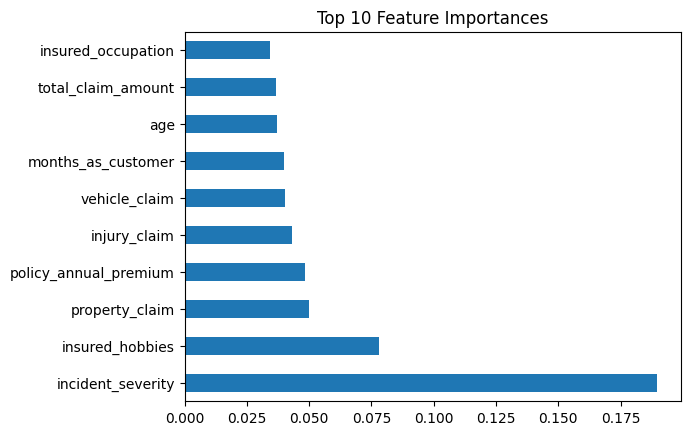

In [63]:
## Optional: Feature importance
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Feature Importances")
plt.show()